# Moderator Counts

## Introduction

The complete co-moderation network for each subreddit includes all redditors to have ever been a moderator of the ego subreddit. However, for the purposes of the network analysis I am only interested in those redditors who still moderate at least one subreddit. Thus redditors who do not moderate at al at the time of data collection, or whose account are no longer active are removed from the data for network analysis. I refer the the subset of currently moderating redditors as ‘active mods’. 

*define mod types*

It is of interest to see how many mods, and of which mod type, are no longer active.

### r/The_Donald
The following figures show the differences between the total number of mods and active mods by mod type for **r/The_Donald**. The figures on the left show counts, those on the right show relative percentages.


The breakdown of mod types for r/The_Donald is:

   active_mods  all_mods  diff  active_%     all_%    diff_%         Mod Type
1           66       167   101  0.589286  0.716738  0.834711   former non-top
2           13        33    20  0.116071  0.141631  0.165289       former top
3           26        26     0  0.232143  0.111588  0.000000  current non-top
4            7         7     0  0.062500  0.030043  0.000000      current top




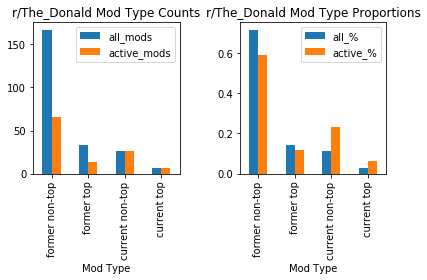

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

sub, subname = 'td', 'r/The_Donald'
date = '2017-10-27'

def mod_counts(sub, date):
    edgelist = pd.read_csv('/Users/emg/Programming/GitHub/mod-timelines/moding-data/{}/{}/lists/edgelist.csv'.format(sub,date))
    nodelist = pd.read_csv('/Users/emg/Programming/GitHub/mod-timelines/moding-data/{}/{}/lists/nodelist.csv'.format(sub,date))
    removed_subs = ['r/0','r/Not Found']
    
    mods = nodelist[nodelist['type']==1]
    
    current = edgelist[~edgelist['sub'].isin(removed_subs)]
    active_nodes = mods[mods['name'].isin(current['name'].unique())]
    
    
    mod_type_counts = mods.mod_type.value_counts().sort_index()
    mod_type_counts_active = active_nodes.mod_type.value_counts().sort_index()
    
    df = pd.DataFrame({'all_mods':mod_type_counts, 'active_mods':mod_type_counts_active})
    
    df['diff'] = df['all_mods'] - df['active_mods']
    df['active_%'] = df['active_mods']/df['active_mods'].sum()
    df['all_%'] = df['all_mods']/df['all_mods'].sum()
    df['diff_%'] = df['diff']/df['diff'].sum()
    
    df['Mod Type'] = ['former non-top', 'former top', \
                      'current non-top', 'current top']
    
    return df

def print_mod_counts(sub, subname, date):
    df = mod_counts(sub, date)
    print('The breakdown of mod types for {} is:'.format(subname))
    print()
    print(df)
    
def mod_plots(df, subname):
    fig, axs = plt.subplots(1,2) # need to widen plots

    df[['all_mods', 'active_mods', 'Mod Type']].plot('Mod Type', kind='bar',
      title = '{} Mod Type Counts'.format(subname), ax=axs[0])
    df[['all_%', 'active_%', 'Mod Type']].plot('Mod Type', kind='bar',
      title = '{} Mod Type Proportions'.format(subname), ax=axs[1])
    
    fig.tight_layout() 


df = mod_counts(sub, date)
print_mod_counts(sub, subname, date)
print()
print()
mod_plots(df, subname)

### r/changemyview

The following figures show the differences between the total number of mods and active mods by mod type for **r/changemyview**. The figures on the left show counts, those on the right show relative percentages.




The breakdown of mod types for r/changemyview is:

   active_mods  all_mods  diff  active_%     all_%    diff_%         Mod Type
1            4         9     5  0.097561  0.169811  0.416667   former non-top
2           10        17     7  0.243902  0.320755  0.583333       former top
3            1         1     0  0.024390  0.018868  0.000000  current non-top
4           26        26     0  0.634146  0.490566  0.000000      current top




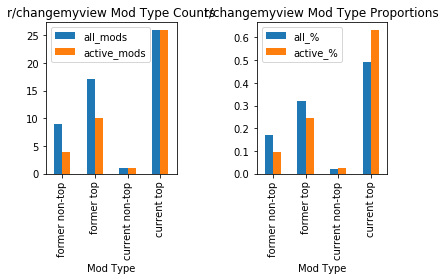

In [11]:
sub, subname = 'cmv', 'r/changemyview'

df = mod_counts(sub, date)
print_mod_counts(sub, subname, date)
print()
print()
mod_plots(df, subname)

td
